<a href="https://colab.research.google.com/github/RicottaChz/Pytorch_Youtube/blob/main/cnnkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000,1)
assert y_test.shape == (10000,1)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)         

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size=150, epochs=1, validation_split=0.1)

300/300 [==============================] - 7s 8ms/step - loss: 1.6088 - accuracy: 0.4164 - val_loss: 1.3826 - val_accuracy: 0.5016


In [16]:
score = model.evaluate(x_test, y_test)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 1.3841 - accuracy: 0.4921
[1.3841222524642944, 0.4921000003814697]


313/313 [==============================] - 1s 2ms/step


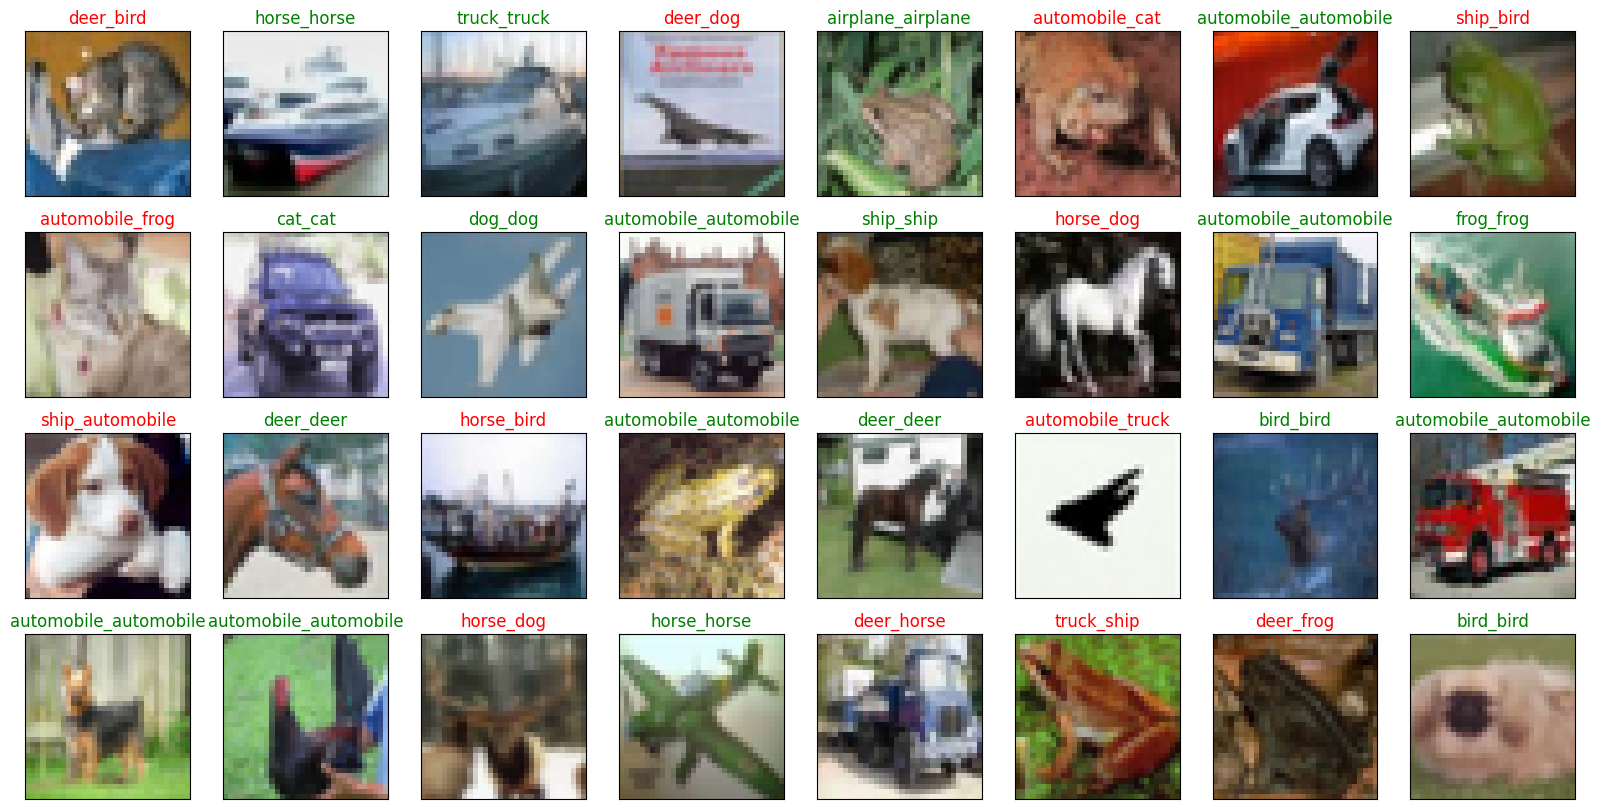

In [18]:
pred = model.predict(x_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(x_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')